# Importing Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")


# Loading Data

In [83]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


# Data Preprocessing

In [69]:
df.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], inplace=True)
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


Age         177
Pclass        0
Sex           0
Fare          0
Survived      0
dtype: int64


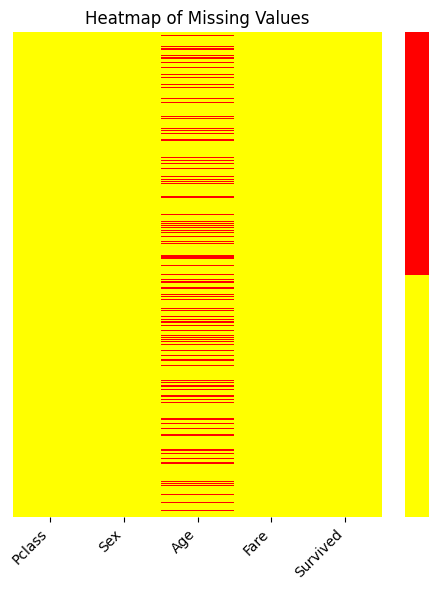

In [71]:
print(df.isnull().sum().sort_values(ascending=False))

plt.figure(figsize=(5, 6))

heatmap = sns.heatmap(df.isna(), 
                      cmap=['yellow', 'red'],
                      cbar_kws={'ticks': []},
                      xticklabels=True,
                      yticklabels=False)

colorbar = heatmap.collections[0].colorbar
colorbar.set_label('') 

ax = plt.gca()
ax.set_title('Heatmap of Missing Values')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

In [72]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df.isnull().sum().sort_values(ascending=False))


Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64


In [73]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.head(7)

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.000000,7.2500,0
1,1,0,38.000000,71.2833,1
2,3,0,26.000000,7.9250,1
3,1,0,35.000000,53.1000,1
4,3,1,35.000000,8.0500,0
5,3,1,29.699118,8.4583,0
6,1,1,54.000000,51.8625,0


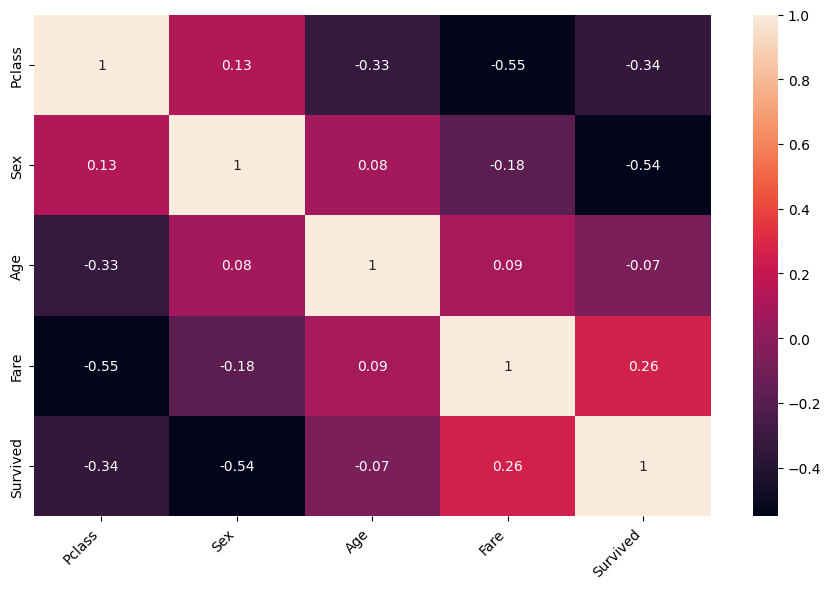

In [74]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr().round(2),annot=True)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# Splitting Data

In [75]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Applying Gaussian Naive Bayes CLassifier

In [76]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [77]:
y_pred = NB.predict(X_test)

# Evaluating the Model

In [78]:
results = {'accuracy':accuracy_score(y_test, y_pred),
    'recall':recall_score(y_test, y_pred, average='weighted'),
    'precision':precision_score(y_test, y_pred, average='weighted'),
    'f1':f1_score(y_test, y_pred, average='weighted')}

results_df = pd.DataFrame([results]).T
results_df


,0
accuracy,0.765363
recall,0.765363
precision,0.764492
f1,0.764830


In [79]:
df0 = pd.DataFrame({'y_test':y_test,
                    'y_pred':y_pred})
df0

,y_test,y_pred
862,1,1
223,0,0
84,1,1
680,0,1
535,1,1
...,...,...
796,1,1
815,0,0
629,0,0
421,0,0


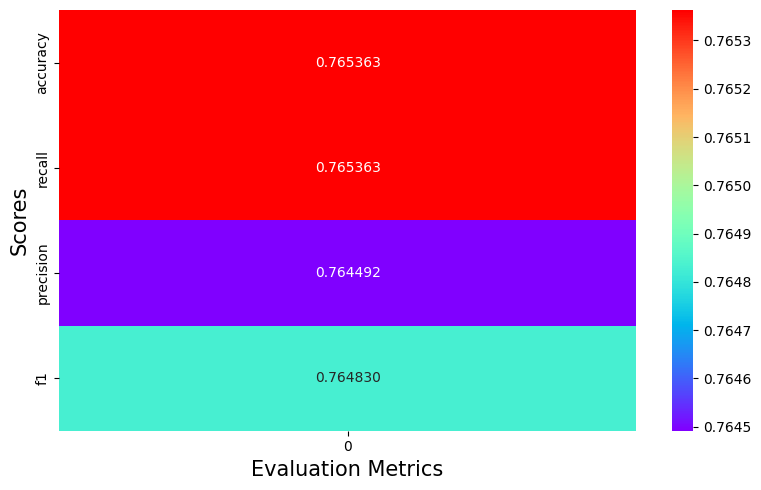

In [80]:
plt.figure(figsize=(8,5))
sns.heatmap(results_df,annot=True,fmt='.6f',cmap="rainbow")
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Evaluation Metrics",fontsize=15)
plt.tight_layout()
plt.show()

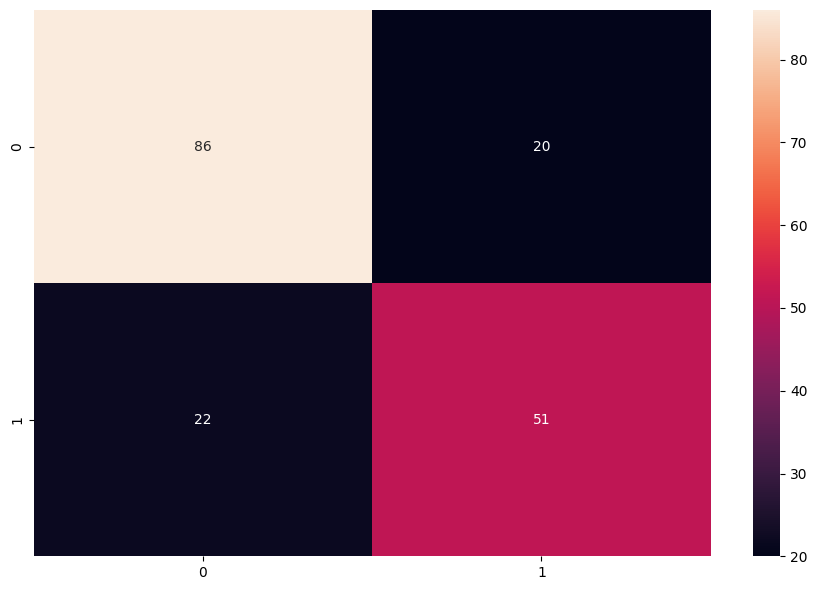

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,6))
sns.heatmap(conf_matrix.round(2),annot=True)

plt.tight_layout()
plt.show()

In [82]:
NB.predict_proba(X_test[:10])

array([[0.0666661 , 0.9333339 ],
       [0.96719032, 0.03280968],
       [0.19647677, 0.80352323],
       [0.42826121, 0.57173879],
       [0.13363585, 0.86636415],
       [0.96218721, 0.03781279],
       [0.92237775, 0.07762225],
       [0.04632622, 0.95367378],
       [0.38647249, 0.61352751],
       [0.42693309, 0.57306691]])